# Raízes (ou zeros)

## Motivação: Exemplo do saltador de Bungee jumping

CHAPRA, S. C. "Métodos numéricos aplicados com MATLAB para engenheiros e cientistas" 

### Definição do problema

Encontre a massa que faz com que um saltador de bungee jumping ultrapasse a velocidade de 36m/s após 4s de queda livre.

A velocidade é dada pela equação:

\begin{equation} \label{eq:jump1}
v(t) = \sqrt{\dfrac{gm}{c_d}}\tanh\left( \sqrt{\dfrac{gc_d}{m}t}\right)
\end{equation}

Suponha que:

* $c_d = 0.25 kg/m$
* $g = 9.8m/s^2$

### Primeira tentativa

Isolar $m$ da equação \ref{eq:jump1}

$
m = f(v,g,c_d,t)
$

Porém, é muito difícil manipular a eq. \ref{eq:jump1} e isolar $m$!


## Solução

### Criando uma nova função

\begin{equation} \label{eq:jump2}
f(m) = \sqrt{\dfrac{gm}{c_d}}\tanh\left( \sqrt{\dfrac{gc_d}{m}t}\right) -v(t)
\end{equation}

Transformamos o problema original em encontrar as raízes (zeros) de $f(m)$!

# Método da força bruta

* O mais simples deles
* Baixa precisão
* Consiste em determinar diversos valores de $f(m)$ e inspecionar manualmente

\begin{equation} 
f(m) = \sqrt{\dfrac{gm}{c_d}}\tanh\left( \sqrt{\dfrac{gc_d}{m}t}\right) -v(t)
\end{equation}

In [297]:
import math as m
import numpy as np

In [298]:
g = 9.8
cd = 0.25
v = 36
t = 4
for massa in np.arange(140.0,154.0,0.1):
    fm = m.sqrt( g*massa/cd ) * m.tanh( m.sqrt( g*cd/massa ) * t ) - v
    print(massa, ' ', fm)

140.0   -0.09060434314937282
140.1   -0.08849141502955149
140.2   -0.08638119906325414
140.29999999999998   -0.08427369003094753
140.39999999999998   -0.08216888272647083
140.49999999999997   -0.08006677195702139
140.59999999999997   -0.07796735254308373
140.69999999999996   -0.07587061931840822
140.79999999999995   -0.07377656712997549
140.89999999999995   -0.07168519083791836
140.99999999999994   -0.06959648531551466
141.09999999999994   -0.06751044544913043
141.19999999999993   -0.06542706613816307
141.29999999999993   -0.06334634229506975
141.39999999999992   -0.061268268845189766
141.49999999999991   -0.05919284072686537
141.5999999999999   -0.057120052891292517
141.6999999999999   -0.05504990030249246
141.7999999999999   -0.05298237793731175
141.8999999999999   -0.05091748078533698
141.9999999999999   -0.04885520384890896
142.09999999999988   -0.04679554214300197
142.19999999999987   -0.04473849069527347
142.29999999999987   -0.042684044545957534
142.39999999999986   -0.040632198

<div class="alert alert-block alert-info">Analisando os dados, vemos que a raíz encontra-se entre 144kg e 145kg.</div>

# Método gráfico

* Um pouco mais refinado
* Permite analisar melhor a função
* Ainda é manual
* Baixa precisão

In [43]:
import matplotlib.pyplot as plt
import mplcursors
%matplotlib widget

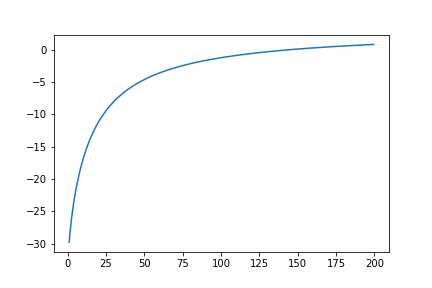

In [44]:
g = 9.8
cd = 0.25
v = 36
t = 4
massa = np.arange(1,200, 0.5)
fm = np.sqrt( g*massa/cd ) * np.tanh( np.sqrt( g*cd/massa ) * t ) - v

plt.plot(massa, fm)
mplcursors.cursor(hover=True)

# Utilizando bibliotecas nativas

* Alta precisão
* Simples
* É preciso entender **quando elas falham!**

In [315]:
import numpy as np
from scipy.optimize import fsolve
np.sqrt(5)

2.23606797749979

In [303]:
def jump(massa):
    g = 9.8
    cd = 0.25
    v = 36
    t = 4
    fm = np.sqrt( g*massa/cd ) * np.tanh( np.sqrt( g*cd/massa ) * t ) - v
    return fm

In [317]:
root = fsolve(jump, 100)
print(root)

[144.40669396]


# Métodos intervalares

Buscam a solução a partir de um intervalo inicial (delimitam a raíz).

## Método da busca incremental

<div>
<img src="figuras/raizes_buscaincremental.svg" width="500"/>
</div>

No método de busca incremental, partimos de um intervalo dado por:

* $x_l$: limite inferior do intervalo
* $x_u$: limite superior do intervalo
* $f(x_l)f(x_u) < 0$: garantia da existência de uma raíz no intervalo

Partindo de um dos limites, verificamos se a função muda de sinal entre as posições $x_i$ e $x_{i+1}$.
Caso mude, dizemos que a raíz encontra-se entre esses pontos, caso contrário, avançamos um passo.

A distância entre cada par de pontos é chamada de passo (h).

O algoritmo termina quando a condição $f(x_i)f(x_{i+1}) < 0$ é satisfeita.

In [318]:
from numpy import sin
from numpy import cos
# funcao que queremos determinar as raizes
def funcao(x):
    return sin(10*x) + cos(3*x)

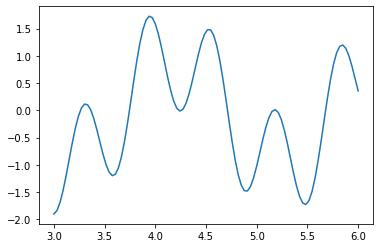

In [262]:
import matplotlib.pyplot as plt
import numpy as np
X = np.linspace(3,6,100)
Y = funcao(X)
plt.plot(X,Y)

In [330]:
def buscaincremental(f, h, xl, xu):
    '''
    Algoritmo de busca incremental. 
    @f: função que desejamos achar a raíz
    @h: valor do passo
    @xl: limite inferior
    @xu: limite superior
    '''
    xi = xl
    while( f(xi)*f(xi+h) > 0):
        xi += h
        print(f'{xi:6.2f} {f(xi):.4f} {f(xi+h):.4f}')
    return xi  

In [331]:
buscaincremental(funcao, 0.02, 3, 6)

  3.02 -1.8719 -1.8039
  3.04 -1.8039 -1.6986
  3.06 -1.6986 -1.5607
  3.08 -1.5607 -1.3963
  3.10 -1.3963 -1.2122
  3.12 -1.2122 -1.0159
  3.14 -1.0159 -0.8154
  3.16 -0.8154 -0.6187
  3.18 -0.6187 -0.4333
  3.20 -0.4333 -0.2663
  3.22 -0.2663 -0.1240
  3.24 -0.1240 -0.0114
  3.26 -0.0114 0.0676


3.2600000000000002

In [254]:
root = fsolve(funcao, 3.2)
print(root)

[3.26242314]


Considerando que escolhemos o valor de $x_r = x_i$ para a raiz, qual o erro que podemos cometer nesta estimativa?

Se escolhermos o valor $x_r = \dfrac{x_i + x_{i+1}}{2}$ para a raiz, qual o maior erro que podemos cometer?

## Método da bissecção

<div>
<img src="figuras/raizes_bisseccao.svg" width="500"/>
</div>

O método da bissecção parte do fato que podemos usar o ponto médio do intervalo para realizar o teste de mudança de sinal.

Desta forma, conseguimos saber em qual subintervalo se encontra a raíz.

In [332]:
from math import sqrt
from math import tanh
def bjump(m):
    cd = 0.25
    g = 9.81
    v = 36
    t = 4
    fm = sqrt(g*m/cd)*tanh(sqrt(g*cd/m)*t) - v
    return fm

In [333]:
def bisseccao_laco_for(f, xl, xu, n):
    '''
    Executa o algoritmo de bisseccao n vezes.
    @f: funcao que desejamos achar o zero
    @xl: limite inferior
    @xu: limite superior
    @n: número de vezes que a bissecção será executada
    '''
    print('xl     xu     xr')
    for i in range(n):
        xr = (xl + xu)/2

        print(f'{xl:6.2f} {xu:6.2f} {xr:6.2f}')
        if (f(xl)*f(xr) < 0):
            xu = xr
        else:
            xl = xr
    return xr

In [268]:
def bisseccao(f, xl, xu, preci sao):
    '''
    Executa o algoritmo de bisseccao até a precisão especificada.
    @f: funcao que desejamos achar o zero
    @xl: limite inferior
    @xu: limite superior
    @precisao: precisao desejada
    '''
    print('xl     xu     xr')
    while ( (xu - xl)/2 > precisao):
        xr = (xl + xu)/2

        print(f'{xl:6.2f} {xu:6.2f} {xr:6.2f}')
        if (f(xl)*f(xr) < 0):
            xu = xr
        else:
            xl = xr
    return xr

In [336]:
bisseccao_laco_for(bjump, 50, 200, 10)

xl     xu     xr
 50.00 200.00 125.00
125.00 200.00 162.50
125.00 162.50 143.75
125.00 143.75 134.38
134.38 143.75 139.06
139.06 143.75 141.41
141.41 143.75 142.58
142.58 143.75 143.16
142.58 143.16 142.87
142.58 142.87 142.72


142.724609375

In [277]:
bisseccao(bjump, 50, 200, 1)

xl     xu     xr
 50.00 200.00 125.00
125.00 200.00 162.50
125.00 162.50 143.75
125.00 143.75 134.38
134.38 143.75 139.06
139.06 143.75 141.41
141.41 143.75 142.58


142.578125

Sabendo que o valor exato da raiz é de 142,7376, calcule o erro verdadeiro cometido em cada iteração

O erro aproximado pode ser obtido a partir da fórmula:

\begin{equation} \label{erroaproximado}
|\epsilon_a| = \bigg | \dfrac{x_r^{novo} - x_r^{velho}}{x_r^{novo}} \bigg |
\end{equation}

Calcule o erro aproximado para o exemplo anterior.

In [337]:
import matplotlib.pyplot as plt
def bisseccao2(f, xl, xu, precisao):
    print('xl     xu     xr     ea     et')
    xt = 142.7376
    xvelho = (xu - xl)/2
    et = []
    ea = []
    
    while ( (xu - xl)/2 > precisao):
        xr = (xl + xu)/2
        
        et.append(abs((xr - xt)/xt))
        ea.append(abs((xr - xvelho)/xr))
        xvelho = xr

        print(f'{xl:6.2f} {xu:6.2f} {xr:6.2f} {ea[-1]:.2%} {et[-1]:.2%}')
        if (f(xl)*f(xr) < 0):
            xu = xr
        else:
            xl = xr
    plt.plot(et)
    plt.plot(ea, 'r')
    return xr

xl     xu     xr     ea     et
 50.00 200.00 125.00 40.00% 12.43%
125.00 200.00 162.50 23.08% 13.85%
125.00 162.50 143.75 13.04% 0.71%
125.00 143.75 134.38 6.98% 5.86%
134.38 143.75 139.06 3.37% 2.57%
139.06 143.75 141.41 1.66% 0.93%
141.41 143.75 142.58 0.82% 0.11%
142.58 143.75 143.16 0.41% 0.30%


143.1640625

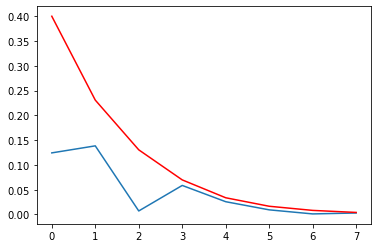

In [155]:
bisseccao2(bjump, 50, 200, 0.5)

## Método da falsa posição

<div>
<img src="figuras/raizes_falsaposicao.svg" width="500"/>
</div>

No método da bissecção utilizarmos o ponto médio $(x_l + x_u)/2$ como estimativa para a raiz.

No método da falsa posição, ligamos uma reta entre os pontos $(x_l, f(x_l) )$ e $(x_u, f(x_u) )$ para determinar a estimativa da raiz.

O valor da raiz é dado por:

\begin{equation} \label{eq:falsaposicao}
x_r = x_u - \dfrac{f(x_u)(x_l - x_u)}{f(x_l) - f(x_u)}
\end{equation}

In [338]:
def falsaposicao_laco_for(f, xl, xu, n):
    print('xl     xu     xr')
    for i in range(n):
        xr = xu - f(xu)*(xl-xu)/(f(xl) - f(xu))
       
        print(f'{xl:6.2f} {xu:6.2f} {xr:6.2f}')
        if (f(xl)*f(xr) < 0):
            xu = xr
        else:
            xl = xr
    return xr

In [341]:
falsaposicao_laco_for(bjump, 50, 200, 10)

xl     xu     xr
 50.00 200.00 176.28
 50.00 176.28 162.38
 50.00 162.38 154.24
 50.00 154.24 149.48
 50.00 149.48 146.69
 50.00 146.69 145.05
 50.00 145.05 144.09
 50.00 144.09 143.53
 50.00 143.53 143.20
 50.00 143.20 143.01


143.0098591360625

# Métodos abertos

Nos métodos abertos, exigem apenas um único valor inicial de $x_r$.

Em alguns casos o método pode divergir.

Estes métodos seguem a fórmula:

\begin{equation} \label{eq:metodosabertos}
x_{k+1} = g(x_k)
\end{equation}

## Iteração do ponto fixo

<div>
<img src="figuras/raizes_pontofixo.svg" width="500"/>
</div>

https://www.ufrgs.br/reamat/CalculoNumerico/livro-sci/sdeduv-iteracao_de_ponto_fixo.html

<div class="alert alert-info">
Um ponto $x$ é chamado de ponto fixo da função $g(x)$ se $g(x) = x$
</div>

Por exemplo, a função $g(x) = x^2 -6$ tem um ponto fixo em $x = 3$.

Considere a função $f(x)$ e a função $g(x) = x - f(x)$.

* Um zero da função $f(x)$ é um ponto fixo da função $g(x)$

<div class="alert alert-info">
Teorema: Seja $\{x_k\}$ a sequência gerada pela relação $x_{k+1} = g(x_k)$.
    Se existir $c \in \Re$ tal que $\lim_\limits{k\rightarrow \infty} x_k = c$, então $c$ é um ponto fixo de $g(x)$.
</div>

Considere um intervalo $I$ tal que:

* O ponto fixo $g(x)$ encontra-se dentro de $I$
* $g'(x) < 1$ para todo $x \in I$
* $x_0 \in I$

Então a sequência $\{x_k\}$ converge para o ponto fixo.

Vamos achar a raiz da função:

$f(x) = e^{-x} - x$,

Vamos procurar agora uma função onde $f(x) = g(x) - x$
Podemos utilizar a função:

$g(x) = e^{-x}$ como função do ponto fixo.

In [359]:
def f(x):
    return np.exp(-x) - x

def g(x):
    return np.exp(-x) 

In [345]:
def pontofixo_laco_for(g, x0, n):
    xi = x0
    for i in range(n):
        xi = g(xi)
        print(f'{xi:.4f}')
    return xi

In [349]:
def pontofixo_laco_for(g, x0, n):
    xi = x0
    xi1 = xi
    erro_aprox = 0
    for i in range(n):
        xi = xi1
        xi1 = g(xi)
        erro_aprox = abs((xi1 - xi)/xi1)
        print(f'{xi1:.4f} {erro_aprox:.2%}')
    return xi1

In [357]:
xr = pontofixo_laco_for(g, 0, 25)

1.0000 100.00%
0.0000 2202546.58%
0.9995 100.00%
0.0000 2191576.26%
0.9995 100.00%
0.0000 2191526.49%
0.9995 100.00%
0.0000 2191526.26%
0.9995 100.00%
0.0000 2191526.26%
0.9995 100.00%
0.0000 2191526.26%
0.9995 100.00%
0.0000 2191526.26%
0.9995 100.00%
0.0000 2191526.26%
0.9995 100.00%
0.0000 2191526.26%
0.9995 100.00%
0.0000 2191526.26%
0.9995 100.00%
0.0000 2191526.26%
0.9995 100.00%
0.0000 2191526.26%
0.9995 100.00%


In [212]:
def pontofixo(g, x0, parada):
    xi = x0
    xi1 = xi
    erro_aprox = parada + 1
    while (erro_aprox > parada):
        xi = xi1
        xi1 = g(xi)
        erro_aprox = abs((xi1 - xi)/xi1)
        print(f'{xi1:.4f} {erro_aprox:.2%}')
    return xi1

In [214]:
xr = pontofixo(g, 0, 0.01)
#print(f(xr))

1.0000 100.00%
0.3679 171.83%
0.6922 46.85%
0.5005 38.31%
0.6062 17.45%
0.5454 11.16%
0.5796 5.90%
0.5601 3.48%
0.5711 1.93%
0.5649 1.11%
0.5684 0.62%
-0.002013991882177435


In [365]:
root = fsolve(f, 1)
print(root)

[0.56714329]


## Método de Newton-Raphson


<div>
<img src="figuras/raizes_newtonraphson.svg" width="500"/>
</div>

O método de Newton-Raphson também segue o formato de:

\begin{equation} 
x_{k+1} = g(x_k)
\end{equation}

Porém, neste caso vamos utilizar a seguinte sequência recursiva: 

\begin{equation} \label{eq:newtonraphson}
x_{k+1} = x_k - \dfrac{f(x_k)}{f'(x_k)}
\end{equation}

Note que ao utilizarmos a tangente no ponto $(x_i, f(x_i))$ nos aproximamos rapidamente da raiz.


In [293]:
import numpy as np
def f(x):
    return np.exp(-x) - x

def df(x):
    return -np.exp(-x) - 1

In [294]:
def newtonraphson_laco_for(f, df, x0, n):
    xvelho = x0
    for i in range(n):
        xnovo = xvelho - f(xvelho)/df(xvelho)
        erro_aproximado = abs((xnovo - xvelho)/xnovo)
        print(f'{i} {xnovo:.6f} {erro_aproximado:.6%}')
        xvelho = xnovo        

In [295]:
newtonraphson_laco_for(f,df, 0, 5)

0 0.500000 100.000000%
1 0.566311 11.709291%
2 0.567143 0.146729%
3 0.567143 0.000022%
4 0.567143 0.000000%


In [281]:
root = fsolve(f, 0)
print(root)

[0.56714329]


## Método da Secante

O método de Newton-Raphson geralmente possui rápida convergência, com seu erro diminuindo de forma quadrática.

Porém, ele requer como entrada a função e a derivada da função.

Uma forma de contornar este problema é aproximarmos numericamente a derivada.

Tal método é conhecido como método da secante

A derivada pode ser aproximada por (método da sencante modificada):

\begin{equation}\label{eq:diferencadividida}
f'(x_i) = \dfrac{f(x_i + \delta) - f(x_i)}{\delta}
\end{equation}

Assim, utilizamos a mesma sequência do método Newton-Raphson (\ref{eq:newtonraphson}):

\begin{equation} 
x_{k+1} = x_k - \dfrac{f(x_k)}{f'(x_k)}
\end{equation}

porém, subtstituindo o valor da derivada por sua aproximação dada em \ref{eq:diferencadividida}, obtemos:

\begin{equation}\label{eq:secantemodificada}
x_{i+1} = x_i - \dfrac{\delta f(x_i)}{f(x_i + \delta) - f(x_i)}
\end{equation}


In [282]:
def secante_laco_for(f, x0, delta, n):
    xvelho = x0
    for i in range(n):
        xnovo = xvelho - delta*f(xvelho)/(f(xvelho+delta) - f(xvelho))
        erro_aproximado = abs((xnovo - xvelho)/xnovo)
        print(f'{i} {xnovo:.6f} {erro_aproximado:.6%}')
        xvelho = xnovo

In [283]:
secante_laco_for(f, 0, 0.1, 10)

0 0.512393 100.000000%
1 0.567592 9.725106%
2 0.567135 0.080580%
3 0.567143 0.001442%
4 0.567143 0.000026%
5 0.567143 0.000000%
6 0.567143 0.000000%
7 0.567143 0.000000%
8 0.567143 0.000000%
9 0.567143 0.000000%
